In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score
from torchvision import transforms as tt
from torchvision import datasets

In [38]:
transform=tt.ToTensor()

In [ ]:
train_data=datasets.CIFAR10(root='./',download=True,train=True,transform=transform)
test_data=datasets.CIFAR10(root='./',download=True,train=False,transform=transform)

In [52]:
train_loader=DataLoader(train_data,batch_size=32,shuffle=True)
test_loader=DataLoader(test_data,batch_size=32,shuffle=False)

In [1]:
from TorchIt import ImageClassifier as ic

In [2]:
class Model(ic.ImageModel):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3,6,5,1) 
        self.conv2=nn.Conv2d(6,16,3,1) 
        self.fc1=nn.Linear(6*6*16,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10) 

    def forward(self,X):
        X=F.relu(self.conv1(X))
        X=F.max_pool2d(X,2,2)
        X=F.relu(self.conv2(X))
        X=F.max_pool2d(X,2,2)
        X=X.view(-1,6*6*16)
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.fc3(X)

        return F.log_softmax(X,dim=1)


In [55]:
lr=0.001
wd=1e-4
gc=0.1
epochs=10

In [56]:
model=Model()

In [57]:
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.AdamW(model.parameters(),lr=lr,weight_decay=wd)
sched=torch.optim.lr_scheduler.OneCycleLR(optimizer,lr,epochs=epochs,steps_per_epoch=len(train_loader))

In [58]:
model.compile(loss_fn=loss,
              optimizer=optimizer,
              scheduler=sched,
              grad_clip=gc)

In [59]:
history=model.fit(epochs=epochs,
                  train_loader=train_loader,
                  val_loader=test_loader)

Training on cpu
Epoch [1], train_loss: 2.0643, train_acc: 0.2238, val_loss: 1.8242, val_acc: 0.3219
Epoch [2], train_loss: 1.6983, train_acc: 0.3813, val_loss: 1.5854, val_acc: 0.4228
Epoch [3], train_loss: 1.5177, train_acc: 0.4515, val_loss: 1.4739, val_acc: 0.4494
Epoch [4], train_loss: 1.3609, train_acc: 0.5098, val_loss: 1.3131, val_acc: 0.5299
Epoch [5], train_loss: 1.2511, train_acc: 0.5519, val_loss: 1.2542, val_acc: 0.5430
Epoch [6], train_loss: 1.1624, train_acc: 0.5841, val_loss: 1.2042, val_acc: 0.5708
Epoch [7], train_loss: 1.0840, train_acc: 0.6124, val_loss: 1.1747, val_acc: 0.5797
Epoch [8], train_loss: 1.0186, train_acc: 0.6385, val_loss: 1.1229, val_acc: 0.6019
Epoch [9], train_loss: 0.9690, train_acc: 0.6556, val_loss: 1.0964, val_acc: 0.6157
Epoch [10], train_loss: 0.9436, train_acc: 0.6658, val_loss: 1.0936, val_acc: 0.6151


In [60]:
model.metrics(test_data)

(0.6154, 0.6137061170832683, 0.6126866381124929)

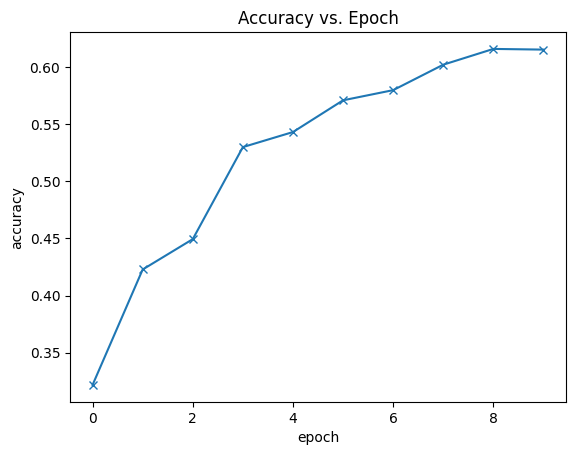

In [61]:
model.plot_accuracies()

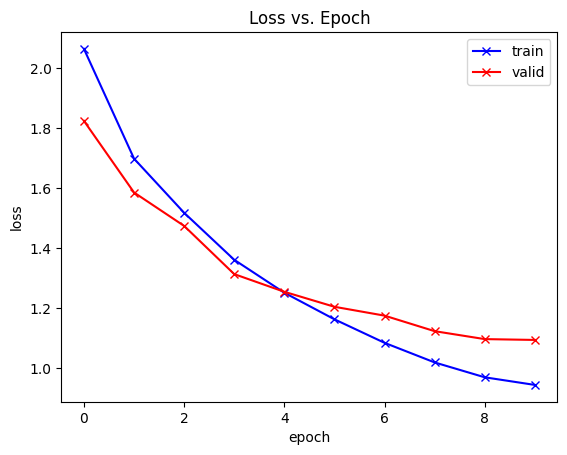

In [62]:
model.plot_losses()